<a href="https://colab.research.google.com/github/Dean-Foulds/bioinformatics/blob/main/squamous_cell_carcinoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug selection sqaumous cell carcinoma**

#### **Machine learning bioinformatics by Dean Foulds**






**Installing libraries**

In [55]:
! pip install chembl_webresource_client

**Importing the libaries**



In [56]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
! rm -rf '/content/requirements.txt'

**Search for a target protein**

In [59]:
target = new_client.target
target_query = target.search('Squamous cell carcinoma')
targets = pd.DataFrame.from_dict(target_query)



In [60]:
targets.head(15)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Squamous carcinoma cell line,30.0,False,CHEMBL613971,[],CELL-LINE,9606.0
1,[],Homo sapiens,DCN1-like protein 1,24.0,False,CHEMBL4105838,"[{'accession': 'Q96GG9', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Homo sapiens,DCN1-like protein 3,24.0,False,CHEMBL4295894,"[{'accession': 'Q8IWE4', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,[],Homo sapiens,DCN1-like protein 5,24.0,False,CHEMBL4295937,"[{'accession': 'Q9BTE7', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,"[{'xref_id': 'Q9H3R0', 'xref_name': None, 'xre...",Homo sapiens,Lysine-specific demethylase 4C,21.0,False,CHEMBL6175,"[{'accession': 'Q9H3R0', 'component_descriptio...",SINGLE PROTEIN,9606.0
5,[],Homo sapiens,DCN1-like protein 1/NEDD8-conjugating enzyme U...,20.0,False,CHEMBL4523603,"[{'accession': 'Q96GG9', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
6,[],None,carcinoma cell line,17.0,False,CHEMBL614380,[],CELL-LINE,NaN
7,[],None,Epidermoid carcinoma cell line,15.0,False,CHEMBL614698,[],CELL-LINE,NaN
8,[],Homo sapiens,Panel (Carcinoma cell lines),15.0,False,CHEMBL612423,[],CELL-LINE,9606.0
9,[],None,Lung carcinoma cell line,15.0,False,CHEMBL614105,[],CELL-LINE,NaN


#### **NumHDonors**

In [61]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL4105838'

In [62]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [63]:
df = pd.DataFrame.from_dict(res)

In [64]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,18112737,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,50.0
1,None,None,18112839,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,1.69
2,None,None,18112840,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.304
3,None,None,18112841,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.353
4,None,None,18112842,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,None,None,24401284,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
387,None,None,24401285,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
388,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24401286,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,0.25
389,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24401287,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,9620.13


**Clean up missing data**

In [65]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-65-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,18112737,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,50.0
1,None,None,18112839,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,1.69
2,None,None,18112840,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.304
3,None,None,18112841,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.353
4,None,None,18112842,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,None,None,24401284,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
387,None,None,24401285,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
388,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24401286,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,0.25
389,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24401287,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,9620.13


In [66]:
len(df2.canonical_smiles.unique())

296

**Remove duplicate data**

In [67]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,18112737,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,50.0
1,None,None,18112839,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,1.69
2,None,None,18112840,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.304
3,None,None,18112841,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.353
4,None,None,18112842,[],CHEMBL4024549,Inhibition of biotin-labeled DCN1 (unknown ori...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,uM,UO_0000065,None,0.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24401283,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,17.14
386,None,None,24401284,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
387,None,None,24401285,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
389,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24401287,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5043811,Inhibition of GST-tagged DCN1 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,DCN1-like protein 1,9606,None,None,IC50,nM,UO_0000065,None,9620.13


## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [68]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,50.0
1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,1690.0
2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,304.0
3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,353.0
4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,314.0
...,...,...,...
385,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,17.14
386,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,10000.0
387,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,10000.0
389,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,9620.13


Saving the dataframe to CSV file

In [69]:
df3.to_csv('squamous_carcinoma_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [70]:
df3 = pd.read_csv('squamous_carcinoma_bioactivity_data_preprocessed.csv')

In [71]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [72]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,50.00,active
1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,1690.00,intermediate
2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,304.00,active
3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,353.00,active
4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,314.00,active
...,...,...,...,...
291,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,17.14,active
292,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,10000.00,inactive
293,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,10000.00,inactive
294,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,9620.13,intermediate


In [73]:
df4.shape

(296, 4)

In [74]:
df4.to_csv('squamous_carcinoma_02_bioactivity_data_curated.csv', index=False)

In [75]:
! zip c_diff.zip *.csv

  adding: squamous_carcinoma_02_bioactivity_data_curated.csv (deflated 83%)
  adding: squamous_carcinoma_bioactivity_data_preprocessed.csv (deflated 82%)


In [76]:
! ls -l

total 72
-rw-r--r-- 1 root root  8913 Aug 24 15:51 c_diff.zip
drwx------ 6 root root  4096 Aug 24 15:37 drive
drwxr-xr-x 1 root root  4096 Aug 22 13:39 sample_data
-rw-r--r-- 1 root root 25735 Aug 24 15:51 squamous_carcinoma_02_bioactivity_data_curated.csv
-rw-r--r-- 1 root root 23103 Aug 24 15:51 squamous_carcinoma_bioactivity_data_preprocessed.csv


# **Bioinformatics Project - Computational Drug Discovery Exploratory Data Analysis**


In [77]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-08-24 15:51:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  89.2MB/s    in 0.9s    

2023-08-24 15:51:58 (89.2 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

In [78]:
! pip install rdkit

     |████████████████████████████████| 29.5 MB 80 kB/s 


In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('squamous_carcinoma_02_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,50.00,active
1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,1690.00,intermediate
2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,304.00,active
3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,353.00,active
4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,314.00,active
...,...,...,...,...
291,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,17.14,active
292,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,10000.00,inactive
293,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,10000.00,inactive
294,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,9620.13,intermediate


In [81]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [82]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [83]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL4099097,50.00,active,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...
1,CHEMBL4101581,1690.00,intermediate,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1
2,CHEMBL4077301,304.00,active,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1
3,CHEMBL4093853,353.00,active,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...
4,CHEMBL4064579,314.00,active,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...
...,...,...,...,...
291,CHEMBL5074683,17.14,active,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...
292,CHEMBL5076605,10000.00,inactive,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...
293,CHEMBL5091490,10000.00,inactive,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1
294,CHEMBL5091907,9620.13,intermediate,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [84]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [85]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [86]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,447.545,6.3925,1.0,2.0
1,397.538,5.5128,1.0,2.0
2,413.993,6.0271,1.0,2.0
3,421.629,6.4971,1.0,2.0
4,447.545,6.3925,1.0,2.0
...,...,...,...,...
291,492.651,6.2409,0.0,9.0
292,471.636,6.7050,1.0,7.0
293,438.628,6.2852,0.0,8.0
294,517.036,4.7898,0.0,11.0


### **Combine DataFrames**



In [87]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,447.545,6.3925,1.0,2.0
1,397.538,5.5128,1.0,2.0
2,413.993,6.0271,1.0,2.0
3,421.629,6.4971,1.0,2.0
4,447.545,6.3925,1.0,2.0
...,...,...,...,...
291,492.651,6.2409,0.0,9.0
292,471.636,6.7050,1.0,7.0
293,438.628,6.2852,0.0,8.0
294,517.036,4.7898,0.0,11.0


In [88]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,50.00,active
1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,1690.00,intermediate
2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,304.00,active
3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,353.00,active
4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,314.00,active
...,...,...,...,...
291,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,17.14,active
292,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,10000.00,inactive
293,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,10000.00,inactive
294,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,9620.13,intermediate



**Combining the 2 DataFrames**

In [89]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [90]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,50.00,active,447.545,6.3925,1.0,2.0
1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,1690.00,intermediate,397.538,5.5128,1.0,2.0
2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,304.00,active,413.993,6.0271,1.0,2.0
3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,353.00,active,421.629,6.4971,1.0,2.0
4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,314.00,active,447.545,6.3925,1.0,2.0
...,...,...,...,...,...,...,...,...
291,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,17.14,active,492.651,6.2409,0.0,9.0
292,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,10000.00,inactive,471.636,6.7050,1.0,7.0
293,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,10000.00,inactive,438.628,6.2852,0.0,8.0
294,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,9620.13,intermediate,517.036,4.7898,0.0,11.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [91]:

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [92]:
df_combined.standard_value.describe()

count       296.000000
mean      11138.490101
std       38399.516573
min           2.250000
25%         293.142500
50%        1235.160000
75%       10000.000000
max      599000.000000
Name: standard_value, dtype: float64

In [93]:
-np.log10( (10**-9)* 100000000 )

1.0

In [94]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [95]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [96]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-95-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,active,447.545,6.3925,1.0,2.0,50.00
1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,intermediate,397.538,5.5128,1.0,2.0,1690.00
2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,active,413.993,6.0271,1.0,2.0,304.00
3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,active,421.629,6.4971,1.0,2.0,353.00
4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,active,447.545,6.3925,1.0,2.0,314.00
...,...,...,...,...,...,...,...,...
291,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,active,492.651,6.2409,0.0,9.0,17.14
292,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,inactive,471.636,6.7050,1.0,7.0,10000.00
293,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,inactive,438.628,6.2852,0.0,8.0,10000.00
294,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,intermediate,517.036,4.7898,0.0,11.0,9620.13


In [97]:
df_norm.standard_value_norm.describe()

count       296.000000
mean      11138.490101
std       38399.516573
min           2.250000
25%         293.142500
50%        1235.160000
75%       10000.000000
max      599000.000000
Name: standard_value_norm, dtype: float64

In [98]:
df_final = pIC50(df_norm)
df_final

<ipython-input-91-0aeeb04fb2d3>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,active,447.545,6.3925,1.0,2.0,7.301030
1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,intermediate,397.538,5.5128,1.0,2.0,5.772113
2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,active,413.993,6.0271,1.0,2.0,6.517126
3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,active,421.629,6.4971,1.0,2.0,6.452225
4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,active,447.545,6.3925,1.0,2.0,6.503070
...,...,...,...,...,...,...,...,...
291,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,active,492.651,6.2409,0.0,9.0,7.765989
292,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,inactive,471.636,6.7050,1.0,7.0,5.000000
293,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,inactive,438.628,6.2852,0.0,8.0,5.000000
294,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,intermediate,517.036,4.7898,0.0,11.0,5.016819


In [99]:
df_final.to_csv('squamous_carcinoma_03_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [100]:
df_2class = df_final[df_final['class'] != 'intermediate']
# df_2class = df_final

In [101]:
df_2class.to_csv('squamous_carcinoma_04_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [102]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

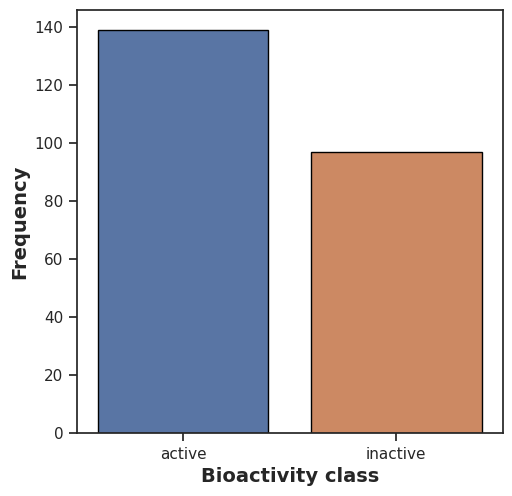

In [103]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

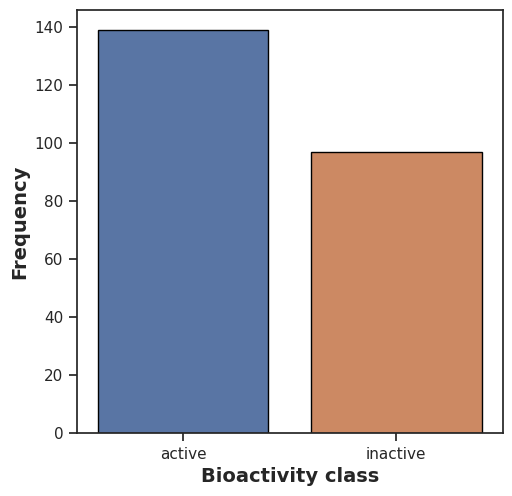

In [104]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

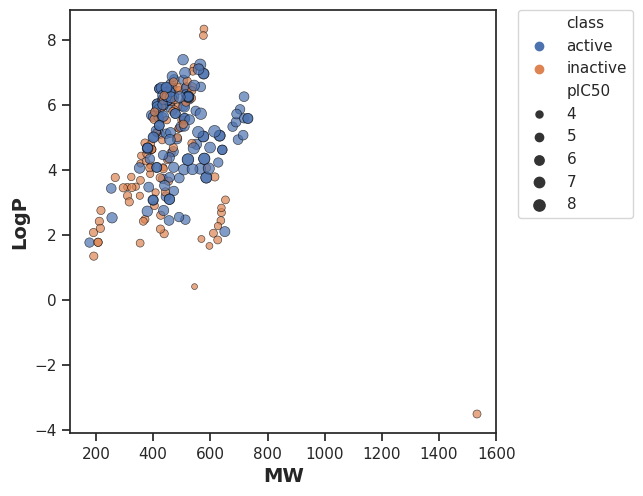

In [105]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box Plots**

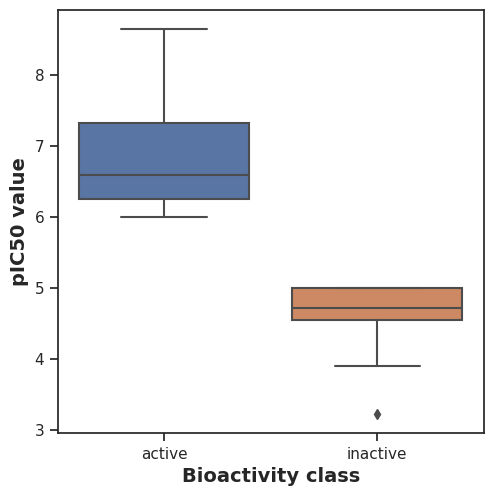

In [106]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [107]:
! pip install scipy

     |████████████████████████████████| 38.1 MB 17.5 MB/s 


In [108]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  intermediate = df[df['class'] == 'active']
  intermediate = intermediate[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(intermediate, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [109]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,13483.0,3.777467e-39,0.05,Different distribution (reject H0)


### **MW**

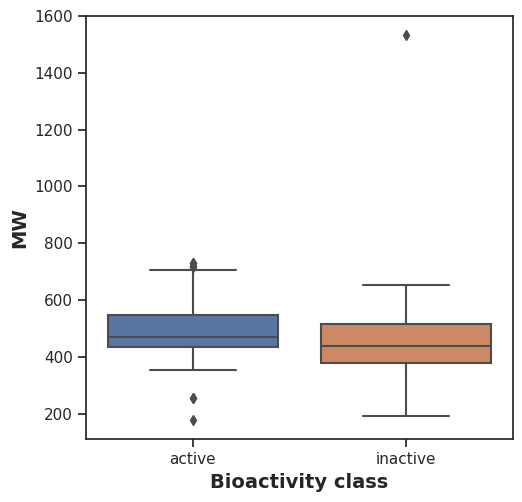

In [110]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [111]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,8444.0,0.000973,0.05,Different distribution (reject H0)


### **logP**

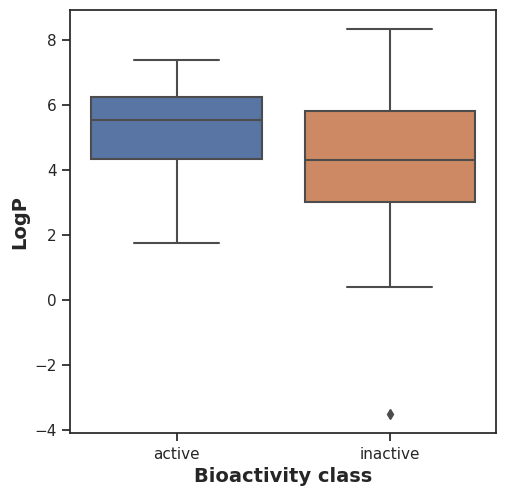

In [112]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [113]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,8817.5,0.000058,0.05,Different distribution (reject H0)


#### **NumHDonors**

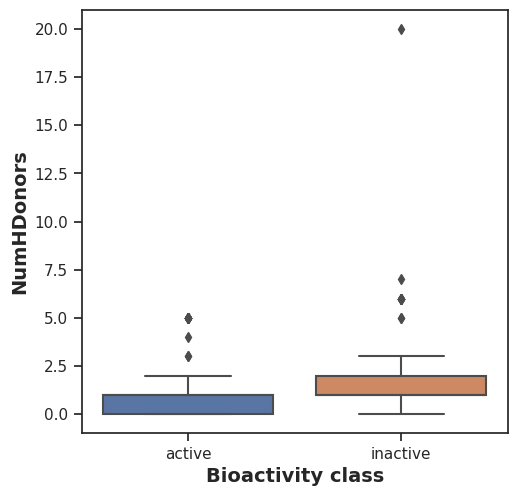

In [114]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [115]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4591.5,0.000013,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

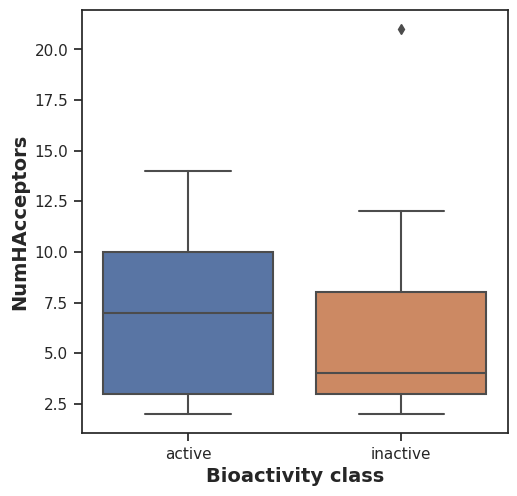

In [116]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [117]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,8371.0,0.00145,0.05,Different distribution (reject H0)


### **Interpretation of Statistical Results**

**Descriptor Calculation and Dataset Preparation**

## **Load bioactivity data**

In [118]:
df3 = pd.read_csv('/content/squamous_carcinoma_03_bioactivity_data_3class_pIC50.csv')

In [119]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL4099097,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F...,active,447.545,6.3925,1.0,2.0,7.301030
1,1,CHEMBL4101581,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1,intermediate,397.538,5.5128,1.0,2.0,5.772113
2,2,CHEMBL4077301,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1,active,413.993,6.0271,1.0,2.0,6.517126
3,3,CHEMBL4093853,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2...,active,421.629,6.4971,1.0,2.0,6.452225
4,4,CHEMBL4064579,CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)...,active,447.545,6.3925,1.0,2.0,6.503070
...,...,...,...,...,...,...,...,...,...
291,291,CHEMBL5074683,COc1ccc(-c2nc(SCc3ccc(C)cc3)nc(Sc3nccs3)c2C#N)...,active,492.651,6.2409,0.0,9.0,7.765989
292,292,CHEMBL5076605,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3c[nH]c4ccccc...,inactive,471.636,6.7050,1.0,7.0,5.000000
293,293,CHEMBL5091490,Cc1ccc(CSc2nc(Sc3nccs3)c(C#N)c(-c3cccs3)n2)cc1,inactive,438.628,6.2852,0.0,8.0,5.000000
294,294,CHEMBL5091907,COc1cc(-c2cc(Sc3nnnn3C)nc(SCc3ccc(Cl)cc3)n2)cc...,intermediate,517.036,4.7898,0.0,11.0,5.016819


In [120]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [121]:
! cat molecule.smi | head -5

CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(F)(F)F)c2)CC1	CHEMBL4099097
CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(F)c2)CC1	CHEMBL4101581
CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(Cl)c2)CC1	CHEMBL4077301
CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2cccc(C(C)C)c2)CC1	CHEMBL4093853
CCCC(C)N1CCC(N(Cc2ccccc2)C(=O)Nc2ccc(C(F)(F)F)cc2)CC1	CHEMBL4064579


In [122]:
! cat molecule.smi | wc -l

296


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

## **Download descriptors**

In [123]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-08-24 15:54:21--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-08-24 15:54:21--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-08-24 15:54:22 (255 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-08-24 15:54:22--  https://github

In [124]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [125]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [126]:
! bash padel.sh

Processing CHEMBL4099097 in molecule.smi (1/296). 
Processing CHEMBL4101581 in molecule.smi (2/296). 
Processing CHEMBL4077301 in molecule.smi (3/296). Average speed: 6.61 s/mol.
Processing CHEMBL4093853 in molecule.smi (4/296). Average speed: 3.55 s/mol.
Processing CHEMBL4064579 in molecule.smi (5/296). Average speed: 3.46 s/mol.
Processing CHEMBL4086099 in molecule.smi (6/296). Average speed: 3.60 s/mol.
Processing CHEMBL4094517 in molecule.smi (7/296). Average speed: 2.57 s/mol.
Processing CHEMBL4077431 in molecule.smi (8/296). Average speed: 2.17 s/mol.
Processing CHEMBL4102261 in molecule.smi (9/296). Average speed: 2.50 s/mol.
Processing CHEMBL4084296 in molecule.smi (10/296). Average speed: 2.17 s/mol.
Processing CHEMBL4078934 in molecule.smi (11/296). Average speed: 1.90 s/mol.
Processing CHEMBL4103209 in molecule.smi (12/296). Average speed: 1.77 s/mol.
Processing CHEMBL4086785 in molecule.smi (13/296). Average speed: 1.75 s/mol.
Processing CHEMBL4105639 in molecule.smi (15/29

In [127]:
! ls -l

total 109124
-rw-r--r-- 1 root root     8913 Aug 24 15:51 c_diff.zip
-rw-r--r-- 1 root root   537629 Aug 24 15:56 descriptors_output.csv
drwx------ 6 root root     4096 Aug 24 15:37 drive
drwxr-xr-x 3 root root     4096 Aug 24 15:54 __MACOSX
-rw-r--r-- 1 root root      122 Aug 24 15:54 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      120 Aug 24 15:54 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Aug 24 15:54 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Aug 24 15:54 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      125 Aug 24 15:54 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    20977 Aug 24 15:54 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Aug 24 15:54 padel.sh
-rw-r--r-- 1 root root 25768637 Aug 24 15:54 padel.zip
-rw-r--r-- 1 root root    14117 Aug 24 15:53 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root   

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [128]:
df3_X = pd.read_csv('/content/descriptors_output.csv')

In [129]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL4101581,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4099097,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4077301,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4093853,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4064579,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,CHEMBL5073859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292,CHEMBL5091490,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,CHEMBL5076605,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,CHEMBL5091907,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
292,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
293,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
294,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [131]:
df3_Y = df3['pIC50']
df3_Y

0      7.301030
1      5.772113
2      6.517126
3      6.452225
4      6.503070
         ...   
291    7.765989
292    5.000000
293    5.000000
294    5.016819
295    5.383989
Name: pIC50, Length: 296, dtype: float64

## **Combining X and Y variable**

In [132]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.301030
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.772113
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.517126
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.452225
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.503070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.765989
292,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
293,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
294,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.016819


In [133]:
dataset3.to_csv('squamous_carcincoma_05_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## **2. Load the data set**

In [134]:
df = pd.read_csv('/content/squamous_carcincoma_05_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**

In [135]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
292,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
293,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
294,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [136]:
Y = df.pIC50
Y

0      7.301030
1      5.772113
2      6.517126
3      6.452225
4      6.503070
         ...   
291    7.765989
292    5.000000
293    5.000000
294    5.016819
295    5.383989
Name: pIC50, Length: 296, dtype: float64

### **3.3. Examine the data dimension**

> Indented block



In [137]:
X.shape

(296, 881)

In [138]:
Y.shape

(296,)

In [139]:
! pip install -U scikit-learn

     |████████████████████████████████| 24.8 MB 63.2 MB/s 
     |████████████████████████████████| 302 kB 51.6 MB/s 


### **3.4. Remove low variance features**

In [140]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [141]:
X.shape

(296, 165)

## **4. Data split (80/20 ratio)**

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [143]:
X_train.shape, Y_train.shape

((236, 165), (236,))

In [144]:
X_test.shape, Y_test.shape

((60, 165), (60,))

## **5. Building a Regression Model using Random Forest**

In [145]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [146]:
np.random.seed(100)
model = tree.DecisionTreeRegressor()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.026068115405277092

In [147]:
Y_pred = model.predict(X_test)

In [148]:
Y_pred

array([6.85010379, 5.        , 6.92237575, 6.53137209, 7.02987843,
       6.92237575, 7.65603438, 5.        , 6.29125306, 7.43949558,
       5.56863624, 5.99900124, 5.73282827, 6.16119348, 5.54522199,
       6.1529779 , 6.85010379, 5.        , 7.02987843, 4.52554901,
       6.32596367, 5.36957212, 7.99452654, 6.29125306, 6.32190673,
       5.07533956, 6.58780834, 6.63604715, 6.4761679 , 8.26121944,
       6.63604715, 6.04095861, 3.22257318, 4.7212464 , 6.92237575,
       5.99900124, 5.71033748, 6.57257881, 4.69897   , 4.69897   ,
       6.16119348, 5.50178045, 6.4416635 , 7.02987843, 7.99452654,
       6.29125306, 4.52554901, 6.08931158, 5.        , 5.07533956,
       6.56284067, 6.53137209, 4.52554901, 5.50178045, 7.65603438,
       6.85585398, 7.65603438, 4.1739252 , 5.        , 6.63604715])

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

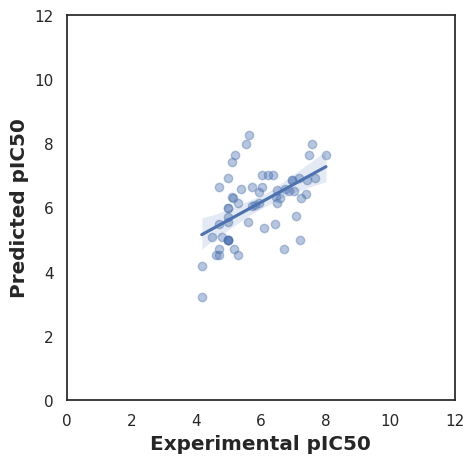

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

**Comparing Regressors**

## **1. Import libraries**

In [150]:
! pip install lightgbm==3.3.3

     |████████████████████████████████| 2.0 MB 8.4 MB/s 


In [151]:
with open('/content/drive/My Drive/requirements.txt', 'r') as f:
    pack = (f.read())


with open('/content/requirements.txt', 'w') as f:
    f.write(pack)


In [152]:
! pip install -r requirements.txt

     |████████████████████████████████| 11.5 MB 9.6 MB/s 
     |████████████████████████████████| 97 kB 2.8 MB/s 
     |████████████████████████████████| 255.9 MB 22 kB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [153]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [154]:
df = pd.read_csv('/content/squamous_carcincoma_05_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [155]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

Examine the shape

In [156]:
X.shape

(296, 881)

In [157]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(296, 165)

In [158]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [159]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:38<00:00,  1.09it/s]


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 165
[LightGBM] [Info] Start training from score 5.875995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 42/42 [00:24<00:00,  1.71it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 165
[LightGBM] [Info] Start training from score 5.875995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [160]:
X_train.shape

(236, 165)

In [161]:
Y_train.shape

(236,)

In [162]:
predictions_train


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.42,0.83,0.46,0.05
ExtraTreeRegressor,0.42,0.83,0.46,0.07
ExtraTreesRegressor,0.42,0.83,0.46,0.74
GaussianProcessRegressor,0.42,0.83,0.46,0.23
XGBRegressor,0.42,0.83,0.46,3.08
RandomForestRegressor,0.28,0.79,0.50,0.64
BaggingRegressor,0.20,0.76,0.53,0.06
GradientBoostingRegressor,0.12,0.74,0.56,0.84
MLPRegressor,0.07,0.72,0.58,1.39


## **Graphic visualisation of model prediction performance**

In [163]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

[(0.0, 1.0)]

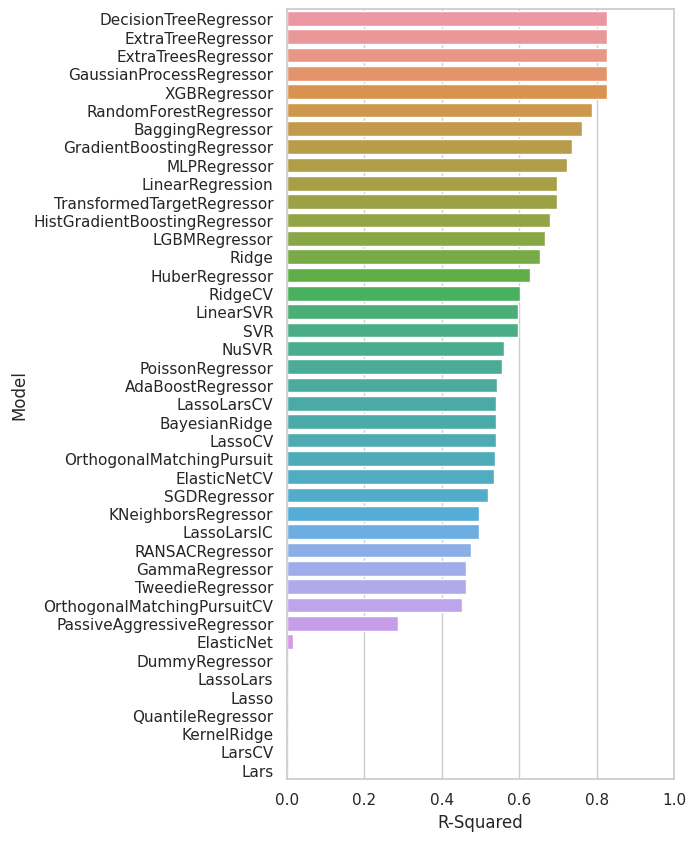

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

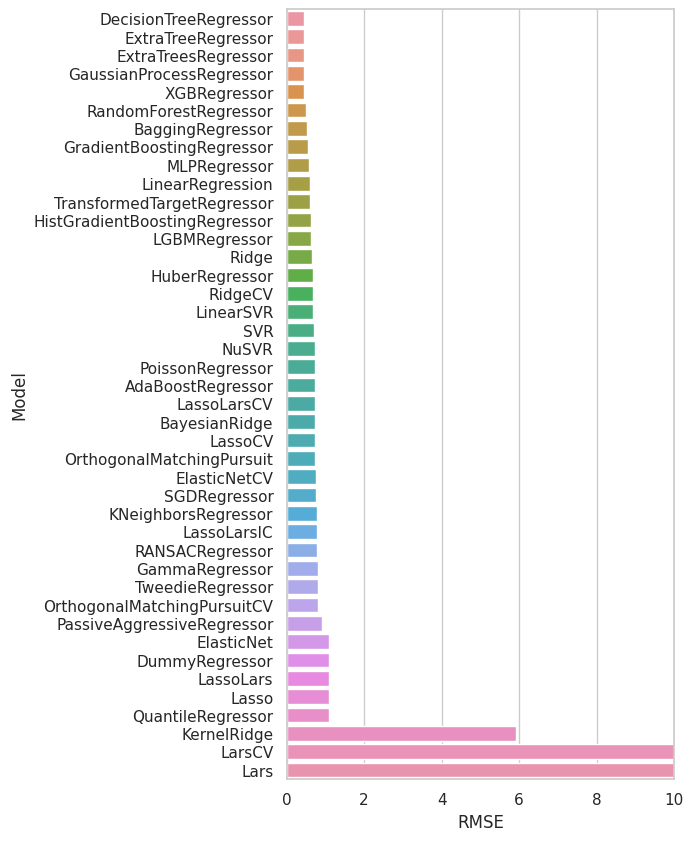

In [175]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

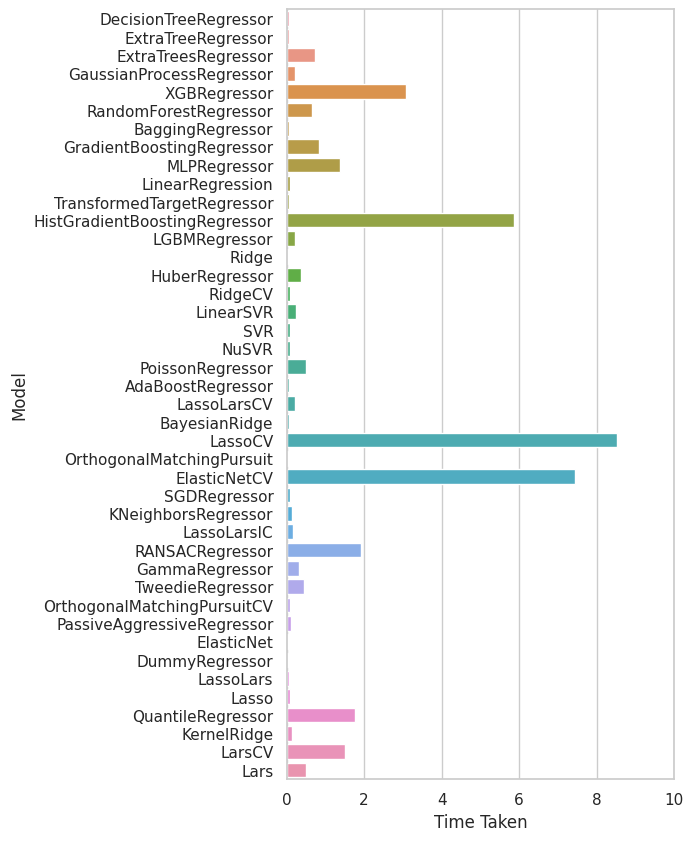

In [176]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [164]:
etr = ExtraTreesRegressor()
print(etr)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

ExtraTreesRegressor()


ExtraTreesRegressor(criterion='mse', max_features='auto', n_estimators='warn')

In [170]:
model = etr.fit(X_train,Y_train)

score = etr.score(X_train, Y_train)
print("Score: ", score)

Score:  0.8265077762001276


In [171]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, Y_train)
gaussian_process.kernel_

258**2 * RBF(length_scale=0.0972)

In [172]:
Y_pred = model.predict(X_test)

In [173]:
Y_pred

array([7.57417164, 6.11932767, 4.71402733, 5.92190585, 7.21243337,
       5.76447155, 4.64342253, 7.91506643, 7.1876977 , 5.14151047,
       6.36291153, 5.99900124, 4.8091089 , 4.53240224, 7.21243337,
       6.6832538 , 7.08618615, 5.89323549, 6.81899957, 6.85387196,
       5.95860731, 5.1154958 , 4.11305138, 4.71402733, 6.13347157,
       6.34937752, 5.89323549, 7.40693371, 5.61193861, 4.8615262 ,
       6.48839412, 4.4436975 , 6.74598723, 4.11305138, 5.        ,
       6.32596367, 6.48839412, 4.71402733, 7.1876977 , 5.71033748,
       4.92990434, 7.34106793, 5.        , 5.36348132, 4.8091089 ,
       6.74598723, 5.12951821, 6.32858211, 6.34937752, 5.89323549,
       5.        , 6.41482355, 4.6190983 , 4.45817206, 7.21243337,
       5.80711633, 4.8091089 , 5.95860731, 4.63827216, 4.46939537])

<function matplotlib.pyplot.show(close=None, block=None)>

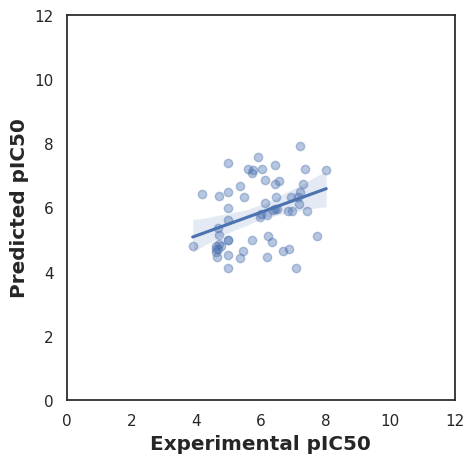

In [177]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show